# Goal:
To understand how class imbalance as well as the raw number of minority examples impact various classifiers

In [7]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from imbalance.data_loader import *

%matplotlib inline

digits:


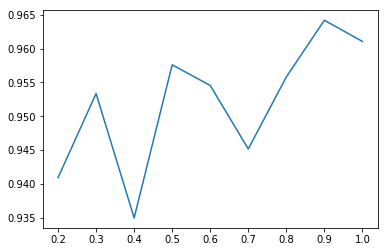

iris:


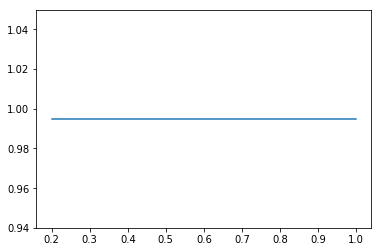

cancer:


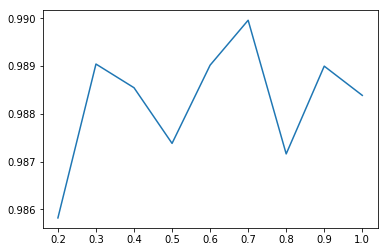

faces:


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [18]:
ps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
folds = 12

perf_data = {}
for name, fetcher in fetchers.iteritems():
    print ("%s:" % name)
    X, y = fetcher()
    skf = StratifiedKFold(n_splits=folds)
    fold_data = []
    for train, test in skf.split(X, y):
        # down-sample the minority class
        p_data = []
        for p in ps:
            X_hat, y_hat = sample_positive_examples(X[train], y[train], p)
            clf = LogisticRegression(solver='lbfgs')
            clf.fit(X_hat, y_hat)
            
            preds = clf.predict_proba(X[test])[:,1]
            auc = roc_auc_score(y[test], preds)
            p_data.append(auc)
        fold_data.append(p_data)
    means = np.mean(fold_data, axis=0)
    plt.plot(ps, means, label=name)
    plt.show()
    perf_data[name] = means